In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:


df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# basic information about the dataset

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.shape

(8807, 12)

In [8]:
# Summary info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Check for nulls
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# Fill less important columns with placeholder
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)
df['country'].fillna('Not Specified', inplace=True)

# Strip leading/trailing whitespace in 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime, letting pandas infer the format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# Drop rows with missing 'date_added', 'rating', or 'duration' (very few rows)
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)



In [14]:
print(" Nulls after cleaning:\n", df.isnull().sum())
print(" Dataset shape after cleaning:", df.shape)


 Nulls after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
 Dataset shape after cleaning: (8790, 12)


In [15]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

In [16]:
# split genres into lists and explode
df['genres'] = df['listed_in'].str.split(', ')
df = df.explode('genres')

In [17]:
# Separate movie and TV show durations
df_movies = df[df['type'] == 'Movie'].copy()
df_shows = df[df['type'] == 'TV Show'].copy()

# Clean duration values
df_movies['duration_int'] = df_movies['duration'].str.replace(' min', '').astype(int)
df_shows['duration_int'] = df_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)


In [20]:
import os

# Create outputs folder if it doesn't exist
os.makedirs("../outputs", exist_ok=True)

# Now export the CSVs
df.to_csv("../outputs/netflix_cleaned.csv", index=False)
df.to_csv("../outputs/netflix_cleaned_exploded.csv", index=False)


## Netflix Content Type Distribution

Let's see how much of Netflix content is **Movies** vs **TV Shows**.


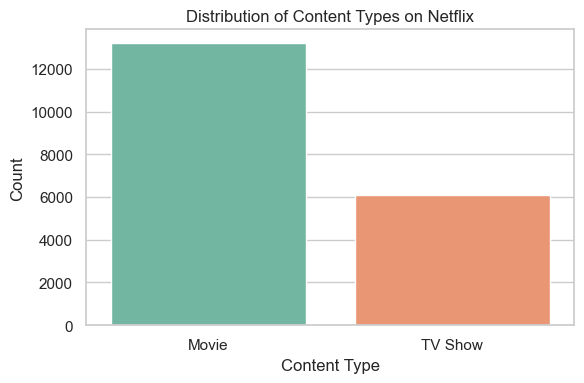

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x=content_counts.index,
    y=content_counts.values,
    hue=content_counts.index,
    palette="Set2",
    legend=False,
    dodge=False
)
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




Using the `date_added` column, we can visualize how much content was added per year. 

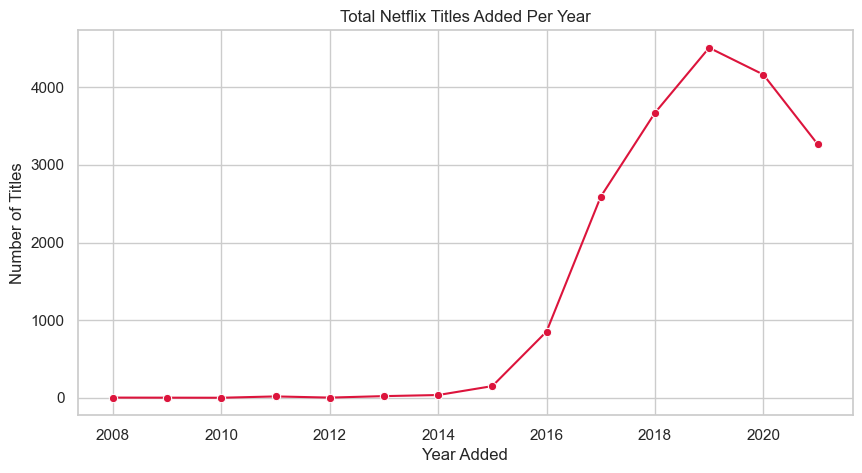

In [22]:
# Group by year_added
yearly_content = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o', color='crimson')
plt.title("Total Netflix Titles Added Per Year")
plt.ylabel("Number of Titles")
plt.xlabel("Year Added")
plt.grid(True)
plt.show()


There was a huge spike in content additions between 2016 and 2019, peaking in 2019 with over 4,000 new titles added. This shows Netflix's aggressive content expansion during that period.

##  Top 10 Countries Producing Netflix Content

Some countries produce a lot more content for Netflix than others. Here's the top 10.


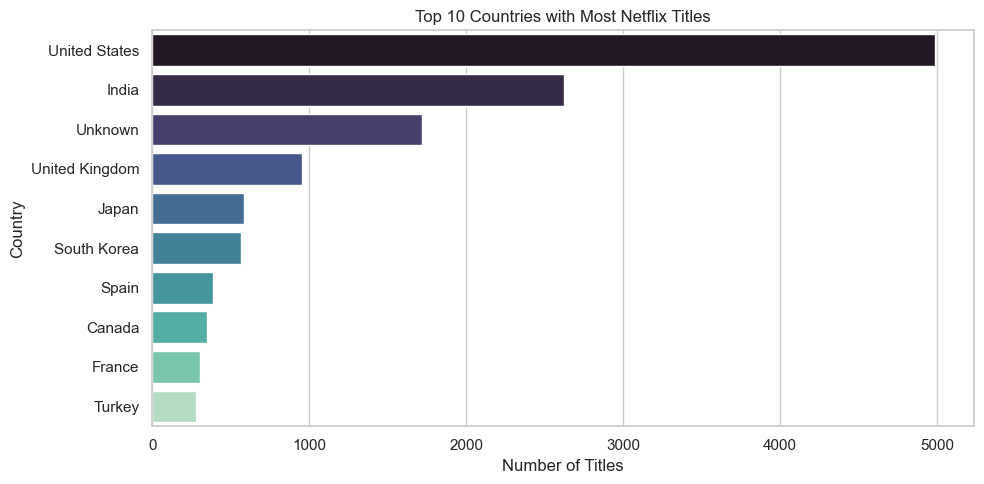

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,  # same as y-axis
    palette="mako",
    legend=False,
    dodge=False
)
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



##  Most Popular Genres on Netflix

Netflix titles often fall into multiple genres. Let's explore the most common ones by exploding the `listed_in` column.


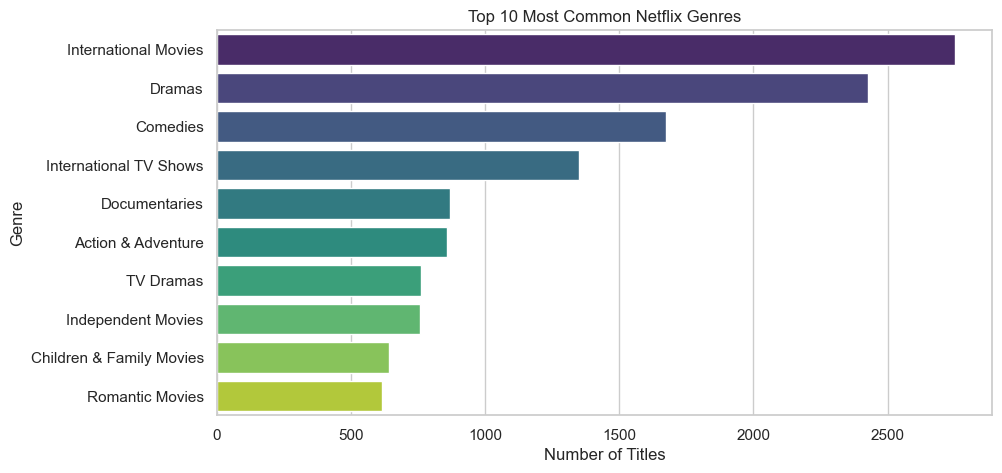

In [26]:
top_genres = df['genres'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette="viridis", dodge=False, legend=False)
plt.title("Top 10 Most Common Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


Netflix is heavily loaded with International Movies, followed by Dramas and Comedies. Many shows and movies fall into multiple categories, and we exploded the listed_in column to analyze this properly.

##  Movie Duration Distribution

How long are most Netflix movies? Let's find out using a histogram.


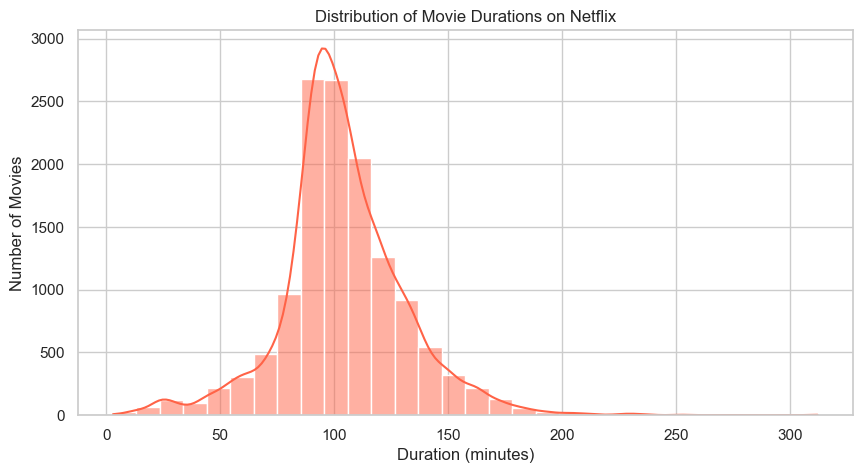

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df_movies['duration_int'], bins=30, kde=True, color='tomato')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.show()




Most Netflix movies fall between 80 and 120 minutes, with the distribution resembling a normal curve. The sweet spot appears to be around 90–100 minutes, which is standard for mainstream films.

## 📺 TV Show Season Count Distribution

How many seasons do most Netflix TV shows have? This tells us about binge-worthiness!


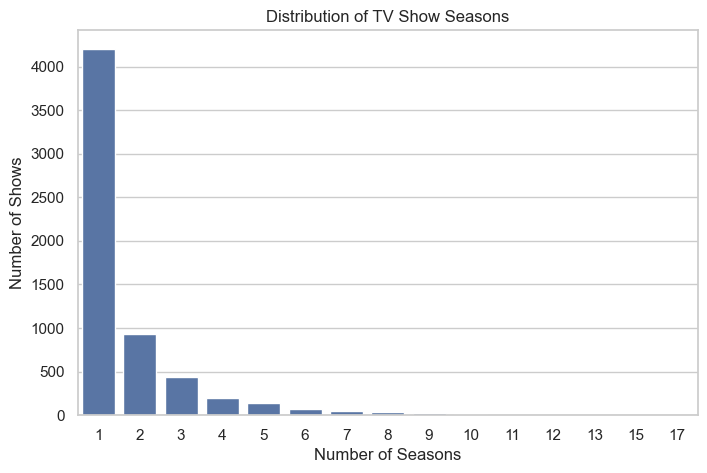

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='duration_int', data=df_shows)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of Shows")
plt.show()


An overwhelming number of Netflix shows only have 1 season. Very few shows have more than 3–4 seasons, showing that short-format series are dominant on the platform.